<a href="https://colab.research.google.com/github/NajdBinrabah/Deep-Learning-with-PyTorch-and-Captum/blob/main/Deep_Learning_with_PyTorch_%26_Captum_Explainability_in_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deep Learning with PyTorch & Captum: Explainability in Image Classification**

##Context

Deep learning, particularly through neural networks, introduces us to a powerful system that mirrors aspects of the human brain. These models process data in layers, identifying patterns and making predictions with impressive accuracy. However, while we broadly understand how neural networks operate, the specifics of their decision-making often remain hidden. Neural networks are often described as “black boxes”, complex models that take in input, process it, and deliver outputs, but without offering full transparency about the internal logic that drives their predictions. As a result, we are left to rely on the outputs without fully grasping why certain outcomes are reached.

The persistent challenge of explainability continues to drive research efforts in the field. In response, powerful tools and libraries have emerged, providing new avenues for exploration and shedding light on how neural networks function. Given PyTorch’s prominence, it became essential to explore its capabilities, particularly **Captum**, fittingly meaning “comprehension” in Latin, a tool designed specifically to address this challenge of explainability.

With Captum, it becomes possible to explore which features are most influential in a model’s prediction and what role specific layers play in that process. It helps bridge the gap between trust and understanding, transforming our view of neural networks from black boxes into systems that can be investigated and explained. Although full transparency remains a long-term goal, Captum provides a tangible path forward, allowing us to uncover the internal mechanics of deep learning models, even if incrementally.




---



##References

- Dataset - https://www.kaggle.com/datasets/sujaykapadnis/smoking/data



---



## **Importing Libraries and Loading the Dataset**

In [ ]:
# Importing essential libraries for data handling and numerical computations
import pandas as pd
import numpy as np

# Importing os for file system and system-specific parameters
import os
import sys

# Importing random for generating random numbers
import random

# Importing seaborn and matplotlib for plotting, including color mapping
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Importing plotly for interactive plots
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Importing PIL for image processing
from PIL import Image

# Importing copy module for deep copy operations
import copy

# Importing PyTorch libraries for deep learning tasks
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms

# Importing scikit-learn tools for data splitting and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Suppressing warnings
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Installing the Kaggle package via pip for dataset access
!pip install kaggle

In [ ]:
# Set up Kaggle API configuration
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d sujaykapadnis/smoking

# Unzip the dataset into the created directory
!unzip smoking.zip

cp: cannot stat '/content/drive/MyDrive/Kaggle_API/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/smoking
License(s): Attribution 4.0 International (CC BY 4.0)
100% 63.8M/63.8M [00:03<00:00, 24.1MB/s]
100% 63.8M/63.8M [00:03<00:00, 17.4MB/s]
Archive:  smoking.zip
  inflating: Testing/Testing/notsmoking_0004.jpg  
  inflating: Testing/Testing/notsmoking_0014.jpg  
  inflating: Testing/Testing/notsmoking_0018.jpg  
  inflating: Testing/Testing/notsmoking_0026.jpg  
  inflating: Testing/Testing/notsmoking_0032.jpg  
  inflating: Testing/Testing/notsmoking_0036.jpg  
  inflating: Testing/Testing/notsmoking_0041.jpg  
  inflating: Testing/Testing/notsmoking_0049.jpg  
  inflating: Testing/Testing/notsmoking_0053.jpg  
  inflating: Testing/Testing/notsmoking_0058.jpg  
  inflating: Testing/Testing/notsmoking_0062.jpg  
  inflating: Testing/Testing/notsmoking_0069.jp

In [ ]:
# Defining the file path for the data sets
train_dir = '/content/Training/Training'
val_dir = '/content/Validation/Validation'
test_dir = '/content/Testing/Testing'

**Observations and Insights:**

After downloading the dataset directly from Kaggle, we can see that it is already split into training, validation, and testing sets. However, I will combine them and resplit the data to ensure that the split is balanced based on the labels.



---



In [ ]:
# Define a function to load image data and labels from a folder
def load_data_from_folder(folder):
    # Initialize empty lists for storing file paths and labels
    data = []
    labels = []

    # Loop through each file in the specified folder
    for filename in os.listdir(folder):
        # Check if the file is an image (JPG or PNG)
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Extract the label from the filename (based on predefined classes)
            label = filename.split('_')[0]
            if label in ['smoking', 'notsmoking']:  # Ensure label is valid
                file_path = os.path.join(folder, filename)
                data.append(file_path)
                labels.append(label)

    # Return a DataFrame with the image paths and corresponding labels
    return pd.DataFrame({'path': data, 'label': labels})

In [ ]:


# Load data from each directory
train_data = load_data_from_folder(train_dir)
val_data = load_data_from_folder(val_dir)
test_data = load_data_from_folder(test_dir)



---



**Understanding the data by viewing a few observations**

In [ ]:
# Preview the first few rows of the DataFrame
train_data.head()

,path,label
0,/content/Training/Training/smoking_0001.jpg,smoking
1,/content/Training/Training/smoking_0015.jpg,smoking
2,/content/Training/Training/smoking_0367.jpg,smoking
3,/content/Training/Training/smoking_0082.jpg,smoking
4,/content/Training/Training/notsmoking_0196.jpg,notsmoking


In [ ]:

# Preview the first few rows of the DataFrame
val_data.head()

,path,label
0,/content/Validation/Validation/smoking_0301.jpg,smoking
1,/content/Validation/Validation/smoking_0036.jpg,smoking
2,/content/Validation/Validation/smoking_0093.jpg,smoking
3,/content/Validation/Validation/smoking_0481.jpg,smoking
4,/content/Validation/Validation/notsmoking_0108...,notsmoking


In [ ]:
# Preview the first few rows of the DataFrame
test_data.head()

,path,label
0,/content/Testing/Testing/notsmoking_0500.jpg,notsmoking
1,/content/Testing/Testing/notsmoking_0091.jpg,notsmoking
2,/content/Testing/Testing/smoking_0205.jpg,smoking
3,/content/Testing/Testing/notsmoking_0515.jpg,notsmoking
4,/content/Testing/Testing/smoking_0407.jpg,smoking


**Observations and Insights:**

From what we can observe, the datasets have been correctly structured as DataFrames with two columns, one for the path of each image and the other for the corresponding label.



---



In [ ]:
# Get the dimensions of the DataFrame
rows, columns = train_data.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 716
Number of columns: 2


In [ ]:
# Get the dimensions of the DataFrame
rows, columns = val_data.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 180
Number of columns: 2


In [ ]:
# Get the dimensions of the DataFrame
rows, columns = test_data.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 224
Number of columns: 2


In [ ]:
# Combining all of the data sets into a single DataFrame
combined_data = pd.concat([train_data, val_data, test_data], ignore_index=True)

In [ ]:
# Preview the first few rows of the DataFrame
combined_data.head()

,path,label
0,/content/Training/Training/smoking_0001.jpg,smoking
1,/content/Training/Training/smoking_0015.jpg,smoking
2,/content/Training/Training/smoking_0367.jpg,smoking
3,/content/Training/Training/smoking_0082.jpg,smoking
4,/content/Training/Training/notsmoking_0196.jpg,notsmoking


In [ ]:
# Get the dimensions of the DataFrame
rows, columns = combined_data.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 1120
Number of columns: 2


In [ ]:
combined_data.shape

(1120, 2)

In [ ]:
# Display a summary of the DataFrame
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    1120 non-null   object
 1   label   1120 non-null   object
dtypes: object(2)
memory usage: 17.6+ KB


**Observations and Insights:**

It appears that the datasets have been successfully merged into one, with the final shape reflecting the sum of the original three datasets and containing both columns as expected.

From the info() output, we can see that the columns are currently of type "object" I will convert them to strings to ensure better compatibility with the model.

In [ ]:
# Convert'path' and 'label' columns to string type
combined_data['path'] = combined_data['path'].astype(str)
combined_data['label'] = combined_data['label'].astype(str)



---



##Exploratory Data Analysis (EDA)

Given the limited number of columns in the dataset, my Exploratory Data Analysis (EDA) will be restricted to Univariate analysis, focusing solely on the label column.

In [ ]:
# Check for any missing values
combined_data.isnull().sum()

,0
path,0
label,0


In [ ]:
# Custom color palette for 'smoking' and 'notsmoking' labels
custom_palette = {
    'smoking': '#B19CD9',
    'notsmoking': '#4a148c',
}

# Counting occurrences of each label in the dataset
label_counts = combined_data['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

# Plotting bar chart to visualize label distribution
fig = px.bar(label_counts,
             x='label', y='count',
             labels={'label': 'Label', 'count': 'Count'},
             title='Distribution of Labels',
             color='label',
             color_discrete_map=custom_palette)

fig.show()

In [ ]:
# Function to display a random sample image for a given label
def show_random_sample(data, label):
    filtered_data = data[data['label'] == label]

    if filtered_data.empty:
        print(f"No images found for label '{label}'.")
        return

    # Randomly select an image path from the filtered data
    random_image_path = random.choice(filtered_data['path'].tolist())

    # Open and display the image
    img = Image.open(random_image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Random sample for label: {label}")
    plt.show()

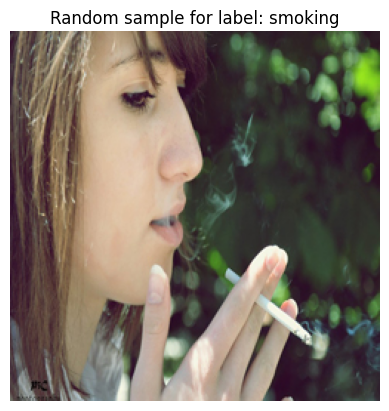

In [ ]:
# Displaying a random sample for the 'smoking' label
show_random_sample(combined_data, label='smoking')

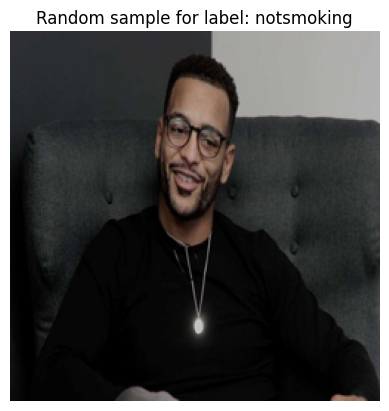

In [ ]:
# Displaying a random sample for the 'notsmoking' label
show_random_sample(combined_data, label='notsmoking')



---



**Encoding the label values to ensure more efficient processing by the model later on.**

In [ ]:
# Encoding the 'label' column: 0 for 'notsmoking', 1 for 'smoking'
combined_data['label_encoded'] = combined_data['label'].map({'notsmoking': 0, 'smoking': 1})

In [ ]:
# Preview the first few rows of the DataFrame
combined_data.head()

,path,label,label_encoded
0,/content/Training/Training/smoking_0001.jpg,smoking,1
1,/content/Training/Training/smoking_0015.jpg,smoking,1
2,/content/Training/Training/smoking_0367.jpg,smoking,1
3,/content/Training/Training/smoking_0082.jpg,smoking,1
4,/content/Training/Training/notsmoking_0196.jpg,notsmoking,0




---



In [ ]:
# Display a summary of the DataFrame
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   path           1120 non-null   object
 1   label          1120 non-null   object
 2   label_encoded  1120 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 26.4+ KB


In [ ]:
# Counting occurrences of each encoded label
combined_data.label_encoded.value_counts()

,count
label_encoded,
1,560
0,560


**Observations and Insights:**

After encoding the label values, the dataset now contains three columns, with all label values successfully encoded.



---



##Creating The Dataset Split

At this stage, I aim to create three splits from the dataset: training, validation, and testing sets. I will begin with a 70%/30% split, allocating 70% for training, while the remaining 30% will be evenly divided between the validation and testing sets.

In [ ]:
# Splitting data into training, validation, and test sets with stratification
train_data, temp_data = train_test_split(combined_data,
                                         test_size=0.3,
                                         stratify=combined_data['label_encoded'],
                                         random_state=42)

val_data, test_data = train_test_split(temp_data,
                                       test_size=0.5,
                                       stratify=temp_data['label_encoded'],
                                       random_state=42)

In [ ]:
# Displaying the number of samples in each dataset
print(f"Training data: {len(train_data)} samples")
print(f"Validation data: {len(val_data)} samples")
print(f"Testing data: {len(test_data)} samples")

Training data: 784 samples
Validation data: 168 samples
Testing data: 168 samples


In [ ]:
# Displaying the distribution of encoded labels in each set
print("Training set distribution:")
print(train_data['label_encoded'].value_counts())

print("\nValidation set distribution:")
print(val_data['label_encoded'].value_counts())

print("\nTesting set distribution:")
print(test_data['label_encoded'].value_counts())

Training set distribution:
label_encoded
0    392
1    392
Name: count, dtype: int64

Validation set distribution:
label_encoded
1    84
0    84
Name: count, dtype: int64

Testing set distribution:
label_encoded
1    84
0    84
Name: count, dtype: int64




---



##Data Augmentation

With only 1,120 data points in this project's dataset, data augmentation becomes essential, not only to broaden the dataset but also to introduce a valuable layer of complexity. This transformation enables the model to learn from a wide range of potential scenarios. Considering the unpredictability of real-world data, particularly in images, data augmentation prepares the model for the diverse situations it may encounter. Images can vary significantly, appearing from unconventional angles, in different levels of sharpness, or under extreme lighting conditions. By covering such cases, data augmentation equips the model to manage these challenges effectively.

It is essential to emphasize, however, that data augmentation should be applied exclusively to the training data, not to the validation or testing sets. Altering these datasets would compromise their reliability and undermine their fundamental role in objectively assessing model performance. For an accurate evaluation, validation and testing data must remain unaltered, consistently representing real-world scenarios.

In [ ]:
# Image transformations for training set: resizing, cropping, augmentations, and normalization
train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomResizedCrop(224),
    transforms.RandomRotation(5),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Transformations for validation and test sets: resizing, normalization
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Custom dataset class to load images and labels, applying transformations if provided
class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx]['path']
        label = self.data.iloc[idx]['label_encoded']
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
# Creating dataset and dataloaders for each set
train_dataset = CustomDataset(train_data, transform=train_transforms)
val_dataset = CustomDataset(val_data, transform=val_test_transforms)
test_dataset = CustomDataset(test_data, transform=val_test_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

**Observations and Insights:**

I believe I have successfully created the new transformed sets. It is important to note that the transformations applied to the validation and testing sets were limited to resizing the images to the correct dimensions and normalizing them.



---



##Establishing The Model

Given the dataset's limited size of 1120 data points, I find data augmentation alone insufficient to address this data scarcity. To compensate, I aim to utilize Transfer Learning,leveraging a pre-trained model built and trained on a related task, termed the "Pretext Task", which shares similarities with the task at hand, referred to as the "Target Task".

I intend to employ a VGG model, recognized for its straightforward, deep architecture and notable performance across image classification benchmarks, originally trained to classify images into one of 1000 distinct classes. However, I am mindful that this pre-training may not have included categories directly comparable to "smoking" and "not smoking". These classes may introduce patterns unfamiliar to the model, particularly when combined with data augmentation, which adds variability in textures and visual cues.

For these reasons, I specifically chose the VGG19 model over VGG16. While VGG16 offers a simpler architecture with fewer layers, I believe that VGG19's added depth provides a better fit for this project. Its additional layers should allow for a more detailed capture of features within the "smoking" and "not smoking" classes, supporting improved accuracy given the complexity introduced by data augmentation.

In [ ]:
# Loading the pre-trained VGG19 model and modifying it for binary classification
model = models.vgg19(weights=models.VGG19_Weights.IMAGENET1K_V1)

# Freezeing the convolutional base layers of the model
for param in model.features.parameters():
    param.requires_grad = False

# Replacing the classifier's final layer to output 2 classes (smoking/notsmoking)
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, 2)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:03<00:00, 184MB/s]


In [ ]:
# Defining the device, loss function, optimizer, and learning rate scheduler
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer - update to use model.classifier.parameters() since VGG16 uses 'classifier' for the final layer
optimizer = optim.SGD(model.classifier.parameters(), lr=0.01, momentum=0.9)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

In [ ]:
# Trainer class for handling model training, evaluation, and early stopping
class Trainer:
    def __init__(self, model, device, criterion, optimizer, scheduler=None, patience=10, checkpoint_path='best_model.pth'):
        self.model = model
        self.device = device
        self.criterion = criterion
        self.optimizer = optimizer
        self.scheduler = scheduler
        self.patience = patience
        self.best_accuracy = 0.0
        self.early_stop = False
        self.counter = 0
        self.checkpoint_path = checkpoint_path

        # Tracking training and validation accuracies and losses
        self.train_accuracies = []
        self.val_accuracies = []
        self.train_losses = []
        self.val_losses = []

    # Method for training the model
    def train(self, train_loader, val_loader, num_epochs=10):
        self.model.to(self.device)
        self.model.train()

        for epoch in range(num_epochs):
            running_loss = 0.0
            correct = 0
            total = 0

            # Iterating over the training data
            for images, labels in train_loader:
                images, labels = images.to(self.device), labels.to(self.device)

                # Forward pass and optimization
                self.optimizer.zero_grad()
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()

                # Tracking loss and accuracy
                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            # Calculating training loss and accuracy
            train_loss = running_loss / len(train_loader)
            train_accuracy = 100 * correct / total
            val_loss, val_accuracy = self.evaluate(val_loader)

            # Storing training and validation metrics
            self.train_losses.append(train_loss)
            self.train_accuracies.append(train_accuracy)
            self.val_losses.append(val_loss)
            self.val_accuracies.append(val_accuracy)

            # Printing training and validation progress for each epoch
            print(f"Epoch [{epoch+1}/{num_epochs}], "
                  f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
                  f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

            # Adjust learning rate if scheduler is used
            if self.scheduler:
                self.scheduler.step(val_loss)
                current_lr = self.scheduler.optimizer.param_groups[0]['lr']
                print(f"Learning rate after epoch {epoch+1}: {current_lr}")

            # Saving the best model based on validation accuracy
            if val_accuracy > self.best_accuracy:
                self.best_accuracy = val_accuracy
                self.counter = 0
                torch.save(self.model.state_dict(), self.checkpoint_path)
                print(f"Model checkpoint saved at epoch {epoch+1} with validation accuracy: {val_accuracy:.2f}%")
            else:
                self.counter += 1
                if self.counter >= self.patience:
                    print("Early stopping triggered.")
                    self.early_stop = True
                    break

    # Method for evaluating the model on validation/test data
    def evaluate(self, data_loader):
        self.model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            # Iterating over the validation/test data
            for images, labels in data_loader:
                images, labels = images.to(self.device), labels.to(self.device)

                # Forward pass and loss calculation
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # Calculating validation loss and accuracy
        val_loss /= len(data_loader)
        val_accuracy = 100 * correct / total
        self.model.train()

        return val_loss, val_accuracy

    # Method to load the best model from the saved checkpoint
    def load_best_model(self):
        """Loads the best model from the checkpoint."""
        self.model.load_state_dict(torch.load(self.checkpoint_path, weights_only=True))
        print("Best model loaded from checkpoint.")

    # Method to predict on new data
    def predict(self, data_loader):
        """Generates predictions for the given data loader."""
        self.model.eval()
        predictions = []
        true_labels = []

        with torch.no_grad():
            # Iterating over the data loader for predictions
            for images, labels in data_loader:
                images = images.to(self.device)
                outputs = self.model(images)
                _, predicted = torch.max(outputs.data, 1)

                predictions.extend(predicted.cpu().numpy())
                true_labels.extend(labels.cpu().numpy())

        return predictions, true_labels

In [ ]:
# Initializing the Trainer class with model, device, loss function, optimizer, scheduler, and patience
trainer = Trainer(model, device, criterion, optimizer, scheduler, patience=10, checkpoint_path='best_model.pth')

# Train the model
trainer.train(train_loader, val_loader, num_epochs=30)

Epoch [1/30], Train Loss: 0.7085, Train Accuracy: 69.26%, Val Loss: 0.4061, Val Accuracy: 85.12%
Learning rate after epoch 1: 0.01
Model checkpoint saved at epoch 1 with validation accuracy: 85.12%
Epoch [2/30], Train Loss: 0.6552, Train Accuracy: 74.49%, Val Loss: 0.3449, Val Accuracy: 86.90%
Learning rate after epoch 2: 0.01
Model checkpoint saved at epoch 2 with validation accuracy: 86.90%
Epoch [3/30], Train Loss: 0.5367, Train Accuracy: 77.42%, Val Loss: 0.2594, Val Accuracy: 88.10%
Learning rate after epoch 3: 0.01
Model checkpoint saved at epoch 3 with validation accuracy: 88.10%
Epoch [4/30], Train Loss: 0.4704, Train Accuracy: 79.59%, Val Loss: 0.3640, Val Accuracy: 87.50%
Learning rate after epoch 4: 0.01
Epoch [5/30], Train Loss: 0.4414, Train Accuracy: 79.97%, Val Loss: 0.3062, Val Accuracy: 92.26%
Learning rate after epoch 5: 0.01
Model checkpoint saved at epoch 5 with validation accuracy: 92.26%
Epoch [6/30], Train Loss: 0.4163, Train Accuracy: 82.65%, Val Loss: 0.3673, V



---



##Reporting The Best Model

In [ ]:
# Loading the best model from the saved checkpoint
trainer.load_best_model()

Best model loaded from checkpoint.


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = trainer.evaluate(test_loader)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 0.2725, Test Accuracy: 91.07%


In [ ]:
# Define custom colors for training and validation curves
train_color = '#4b0082'
val_color = '#9370DB'

# Creating subplots for model accuracy and loss using Plotly
fig = make_subplots(rows=1, cols=2, subplot_titles=("Model Accuracy", "Model Loss"))

# Adding training accuracy plot
fig.add_trace(go.Scatter(x=list(range(1, len(trainer.train_accuracies) + 1)),
                         y=trainer.train_accuracies,
                         mode='lines+markers',
                         name='Training Accuracy',
                         line=dict(color=train_color)),
              row=1, col=1)

# Adding validation accuracy plot
fig.add_trace(go.Scatter(x=list(range(1, len(trainer.val_accuracies) + 1)),
                         y=trainer.val_accuracies,
                         mode='lines+markers',
                         name='Validation Accuracy',
                         line=dict(color=val_color)),
              row=1, col=1)

# Adding training loss plot
fig.add_trace(go.Scatter(x=list(range(1, len(trainer.train_losses) + 1)),
                         y=trainer.train_losses,
                         mode='lines+markers',
                         name='Training Loss',
                         line=dict(color=train_color)),
              row=1, col=2)

# Adding validation loss plot
fig.add_trace(go.Scatter(x=list(range(1, len(trainer.val_losses) + 1)),
                         y=trainer.val_losses,
                         mode='lines+markers',
                         name='Validation Loss',
                         line=dict(color=val_color)),
              row=1, col=2)

# Setting the layout and titles for the figure
fig.update_layout(title_text="Model Metrics",
                  height=500, width=1340,
                  showlegend=True)

# Updating the axes titles
fig.update_xaxes(title_text='Epochs', row=1, col=1)
fig.update_yaxes(title_text='Accuracy (%)', row=1, col=1)

fig.update_xaxes(title_text='Epochs', row=1, col=2)
fig.update_yaxes(title_text='Loss', row=1, col=2)

fig.show()

**Observations and Insights:**

**Model Accuracy:**
- The training accuracy starts at 69.26% in the first epoch and steadily improves over the course of training. By epoch 20, it reaches 90.05%, reflecting a strong learning curve as the model effectively captures patterns in the training data.

- The validation accuracy follows a similar trend, starting at 85.12% in epoch 1 and quickly reaching a high of 92.86% by epoch 12. This early stabilization with minor fluctuations shows strong generalization to the validation data.

**Model Loss:**

- The training loss begins at 0.7085 in the first epoch and decreases steadily as the model learns, dropping below 0.3 by epoch 10 and reaching around 0.23 by epoch 20. This steady decrease indicates that the model is effectively minimizing errors on the training data.

- The validation loss also starts high but quickly converges with the training loss, reaching a stable level of around 0.23-0.25 by epoch 10, with only minor fluctuations thereafter. This alignment with training loss signifies effective regularization and minimal overfitting.

Overall, the model achieves high and stable validation accuracy and low validation loss by the end of the training process, reflecting strong generalization and efficient learning. The controlled learning rate adjustments, and early stopping collectively optimize the training process, making the model well-suited for unseen data without significant risk of overfitting.

In [ ]:
# Generating predictions and comparing with true labels for the test dataset
predictions, true_labels = trainer.predict(test_loader)

# Print sample predictions
print("Predictions:", predictions[:20])
print("True Labels:", true_labels[:20])

Predictions: [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
True Labels: [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]


In [ ]:
# Print classification report
print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=['notsmoking', 'smoking']))


Classification Report:
              precision    recall  f1-score   support

  notsmoking       0.93      0.89      0.91        84
     smoking       0.90      0.93      0.91        84

    accuracy                           0.91       168
   macro avg       0.91      0.91      0.91       168
weighted avg       0.91      0.91      0.91       168



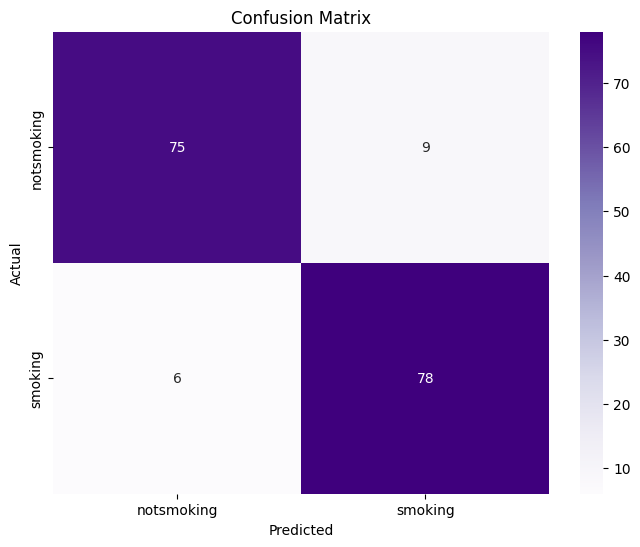

In [ ]:
# Assign true labels and predictions for confusion matrix calculation
y_true = true_labels
y_pred = predictions

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the class labels
labels = ['notsmoking', 'smoking']

# Define the color palette for the heatmap
purple_cmap = sns.color_palette("Purples", as_cmap=True)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=purple_cmap, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Observations and Insights:**

From the confusion matrix above, the model shows some difficulty in accurately classifying "not smoking" images, with 9 instances of misclassification. In contrast, classifying "smoking" images appears to be less challenging, with only 6 misclassifications.



---



In [ ]:
# Define a function to reverse the normalization of an image
def unnormalize(image, mean, std):
    image = image * std[:, None, None] + mean[:, None, None]
    image = np.clip(image, 0, 1)
    return image

# Define a function to visualize a few predictions
def visualize_predictions(data_loader, predictions, true_labels, num_samples=5):
    class_names = ['notsmoking', 'smoking']

    # Extract images and labels from the data loader
    data_iter = list(data_loader)
    all_images, all_labels = zip(*data_iter)

    # Flatten the list of batches into individual images and labels
    all_images = [img.numpy() for batch in all_images for img in batch]
    all_labels = [lbl.numpy() for batch in all_labels for lbl in batch]

    # Randomly select a few samples to visualize
    random_indices = random.sample(range(len(all_images)), num_samples)

    # Create a figure with subplots for each sample
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    # Define mean and std used during image normalization
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Loop through the selected indices and plot images with predicted and true labels
    for idx, ax in zip(random_indices, axes):
        image = all_images[idx]
        true_label = class_names[true_labels[idx]]
        predicted_label = class_names[predictions[idx]]

        # Unnormalize the image for visualization
        image = unnormalize(image, mean, std)

        ax.imshow(np.transpose(image, (1, 2, 0)))
        ax.set_title(f"True: {true_label}\nPredicton: {predicted_label}")
        ax.axis('off')

    plt.tight_layout()

    plt.show()

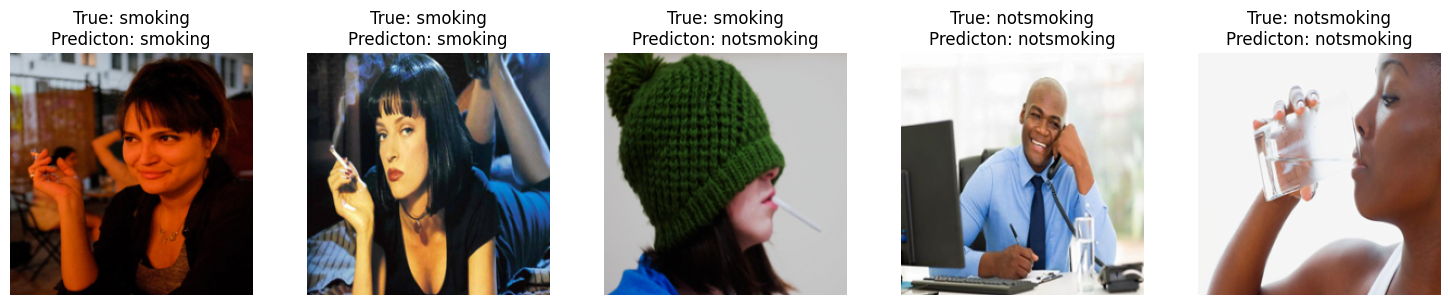

In [ ]:
# Visualizing the predictions
visualize_predictions(test_loader, predictions, true_labels)

**Observations and Insights:**

This displays a random sample of predicted labels alongside their true labels for clear comparison. In this sample, we can observe one instance where the model misclassified an image of a smoking person as "not smoking". If another random sample were generated, it's likely that similar misclassifications could appear, as suggested by the confusion matrix.



---



##Explainability with Captum

Captum, introduced at the beginning of this project, is an extension library for PyTorch, focused on model interpretability and explainability techniques. The name "Captum", meaning "comprehension" in Latin, reflects its purpose: enhancing our understanding of model behavior. By facilitating access to a range of interpretability and explainability methods, Captum has established itself as a valuable tool in the evolving domain of model interpretability, a field that continues to advance through active research.
</br>
</br>
Captum organizes its attribution methods into three distinct categories: Primary Attribution, Layer Attribution, and Neuron Attribution, each offering a unique perspective:
- Primary Attribution: Evaluates contribution of each input feature to the output of a model.
- Layer Attribution: Evaluates contribution of each neuron in a given layer to the output of the model.
- Neuron Attribution: Evaluates contribution of each input feature on the activation of a particular hidden neuron.


As I explore this area for the first time, my focus in this project will be on Primary Attribution and Layer Attribution. These methods offer a foundational perspective on feature and layer contributions, opening up further avenues for analyzing and interpreting model behavior.

In [ ]:
# Installing the Captum library for model interpretability in PyTorch
!pip install captum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.2 MB/s eta 0:00:00


In [ ]:
# Importing various attribution methods and visualization tools from Captum
from captum.attr import IntegratedGradients, LayerGradCam, Occlusion, LayerAttribution
from captum.attr import IntegratedGradients, visualization as viz

In [ ]:
# Ensure the model is in evaluation mode
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd



---



**Reverting Encoded Predicted Labels to Original Values**

In [ ]:
# Define a transformation pipeline for preprocessing images
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

# Define normalization values for input data
transform_normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

# Set the model to evaluation mode
model.eval()
model.to(device)

# Initialize list to store predicted labels
predicted_labels = []

# Iterate over each image in the combined dataset
for index, row in combined_data.iterrows():
    img_path = row['path']

    # Open and process image
    img = Image.open(img_path)
    transformed_img = transform(img)
    input_img = transform_normalize(transformed_img)
    input_img = input_img.unsqueeze(0).to(device)

    # Perform inference with the model
    with torch.no_grad():
        output = model(input_img)

        # Get predicted class
        pred_label_idx = output.argmax(dim=1).item()

    predicted_labels.append(pred_label_idx)

# Create a copy of the dataset to store predictions
predictions_df = combined_data.copy()
predictions_df['predicted_label'] = predicted_labels

# Define a mapping for predicted labels to actual class names
label_mapping = {0: 'notsmoking', 1: 'smoking'}
predictions_df['predicted_label_str'] = predictions_df['predicted_label'].map(label_mapping)

In [ ]:
# Preview the first few rows of the DataFrame
predictions_df.head()

,path,label,label_encoded,predicted_label,predicted_label_str
0,/content/Training/Training/smoking_0001.jpg,smoking,1,1,smoking
1,/content/Training/Training/smoking_0015.jpg,smoking,1,1,smoking
2,/content/Training/Training/smoking_0367.jpg,smoking,1,1,smoking
3,/content/Training/Training/smoking_0082.jpg,smoking,1,1,smoking
4,/content/Training/Training/notsmoking_0196.jpg,notsmoking,0,0,notsmoking




---



**Displaying Random Image with True Label, Encoded Value, Predicted Label, and Prediction Probability for Insight**

True label: smoking
Predicted class index: 1
Predicted label: smoking
Prediction probability: 0.9999


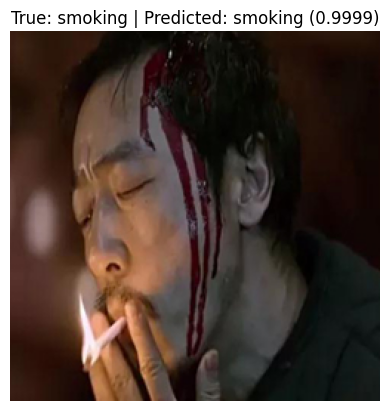

In [ ]:
# Select a random index from the predictions dataframe
random_index = random.randint(0, len(predictions_df) - 1)
random_image_path = predictions_df.iloc[random_index]['path']
true_label = predictions_df.iloc[random_index]['label']  # Get the true label from the DataFrame

# Open and process the random image
img = Image.open(random_image_path)
transformed_img = transform(img)
input_img = transform_normalize(transformed_img)
input_img = input_img.unsqueeze(0).to(device)

# Perform inference with the model
with torch.no_grad():
    output = model(input_img)

    # Apply softmax to convert logits to probabilities
    probabilities = F.softmax(output, dim=1)
    probs = probabilities.squeeze().cpu().numpy()

    # Get predicted class and its probability
    pred_label_idx = output.argmax(dim=1).item()
    predicted_prob = probs[pred_label_idx]

# Print out the results
print(f"True label: {true_label}")
print(f"Predicted class index: {pred_label_idx}")
print(f"Predicted label: {label_mapping[pred_label_idx]}")
print(f"Prediction probability: {predicted_prob:.4f}")

plt.imshow(img)
plt.title(f"True: {true_label} | Predicted: {label_mapping[pred_label_idx]} ({predicted_prob:.4f})")
plt.axis('off')

plt.show()



---



###**Pramiary Attribution**

Integrated Gradients explains the importance of each part of the image by gradually transforming it from a baseline, such as a black image, to the original, while tracking how the model's prediction changes. By calculating gradients at multiple points along this transformation and summing them, this technique identifies the features that contributed most significantly to the prediction.

####**Integrated Gradients**

In [ ]:
# Initialize Integrated Gradients
integrated_gradients = IntegratedGradients(model)

# Compute attributions using Integrated Gradients
attributions_ig = integrated_gradients.attribute(input_img, target=pred_label_idx, n_steps=200)

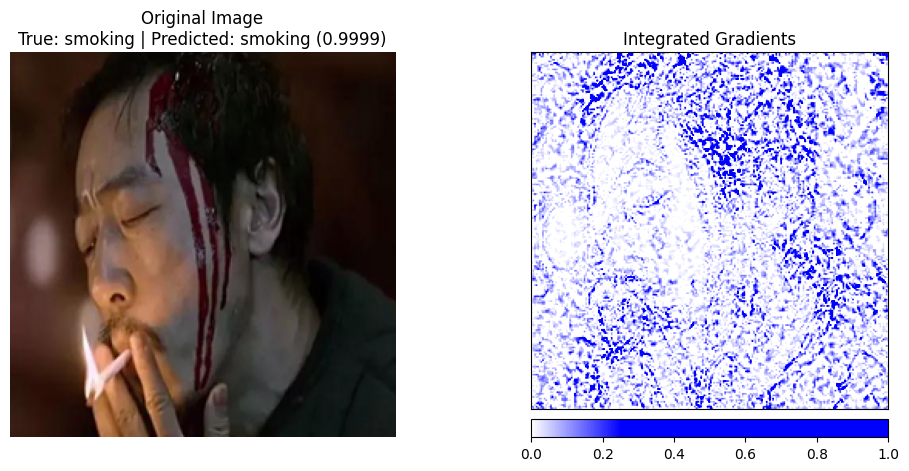

<Figure size 640x480 with 0 Axes>

In [ ]:
# Convert attributions and input image to NumPy arrays for visualization
attributions_ig_np = np.transpose(attributions_ig.squeeze().cpu().detach().numpy(), (1, 2, 0))
input_img_np = np.transpose(input_img.squeeze().cpu().numpy(), (1, 2, 0))

# Unnormalize the original image for display
unnormalized_img = np.array(img) / 255.0

# Prepare a custom color map
default_cmap = LinearSegmentedColormap.from_list(
    'custom blue', [(0, '#ffffff'), (0.25, '#0000ff'), (1, '#0000ff')], N=256
)

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Display the original
axes[0].imshow(unnormalized_img)
axes[0].set_title(f"Original Image\nTrue: {true_label} | Predicted: {label_mapping[pred_label_idx]} ({predicted_prob:.4f})")
axes[0].axis('off')

# Plot the Integrated Gradients attributions
viz.visualize_image_attr(
    attributions_ig_np,
    input_img_np,
    method='heat_map',
    cmap=default_cmap,
    show_colorbar=True,
    sign='positive',
    title='Integrated Gradients',
    plt_fig_axis=(fig, axes[1])
)

plt.tight_layout()

plt.show()

**Observations and Insights:**

From what we can observe, the features the model considers significant in its predictions are highlighted in blue. In this image, the highlighted areas include portions of the face, particularly around the mouth, as well as the hand and the object being held. These regions are key indicators when assessing whether the individual in the image is smoking.

In this instance, we notice the highest density of blue concentrated around the cigarette and the fingers holding it.



---



####**Occlusion**

Occlusion assesses the importance of image regions by selectively masking them. A fixed-size window slides across the image, replacing contents with a baseline value, usually zeros, to reveal the areas most critical to the model. This technique assigns an importance score to each feature by evaluating changes in the model's output when those regions are masked.

In [ ]:
# Initialize Occlusion object with the model
occlusion = Occlusion(model)

# Compute occlusion attributions
attributions_occ = occlusion.attribute(
    input_img,
    target=pred_label_idx,
    strides=(3, 8, 8),
    sliding_window_shapes=(3, 15, 15),
    baselines=0
)

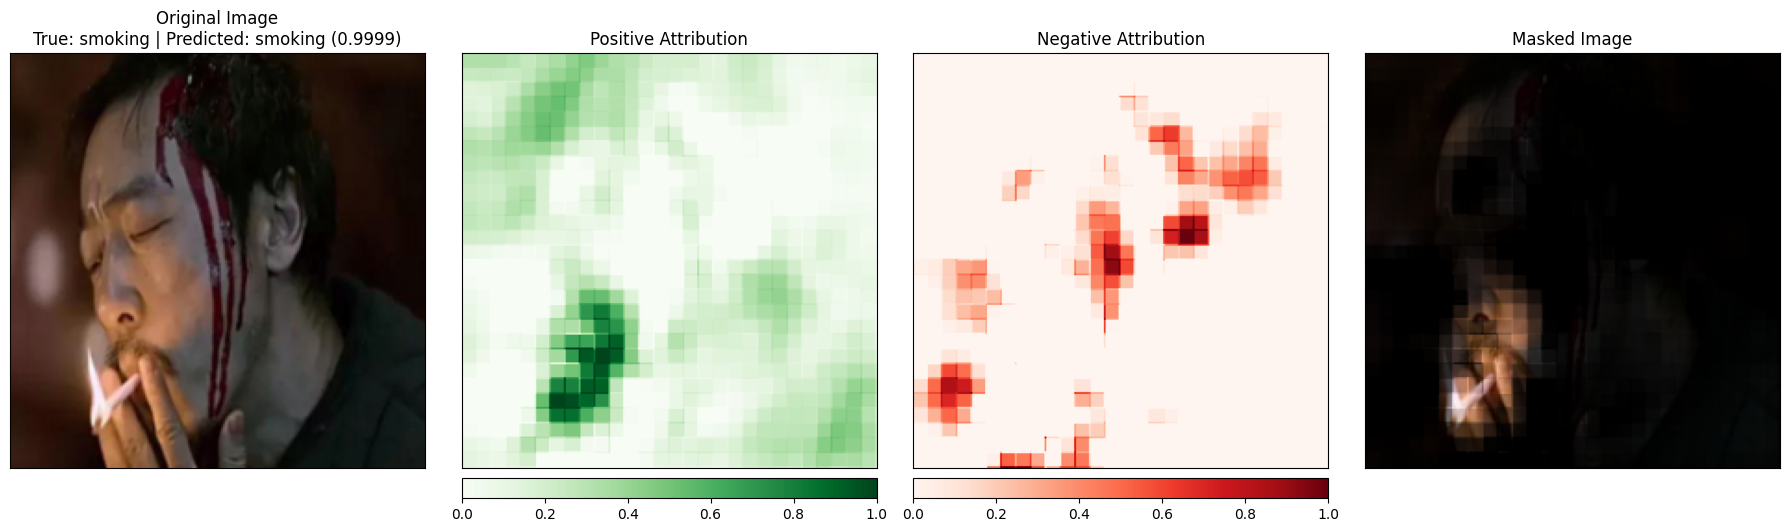

In [ ]:
# Define mean and std for unnormalization
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

# Convert input tensor to the correct format for visualization
input_tensor_for_viz = input_img.squeeze().cpu().detach().numpy()
input_tensor_for_viz = np.transpose(input_tensor_for_viz, (1, 2, 0))
input_tensor_for_viz = std * input_tensor_for_viz + mean
input_tensor_for_viz = np.clip(input_tensor_for_viz, 0, 1)

# Convert attributions for visualization
attributions_for_viz = np.transpose(attributions_occ.squeeze().cpu().detach().numpy(), (1, 2, 0))

# Unnormalize the original image for comparison
unnormalized_img = np.array(img) / 255.0

# Visualize the attributions using visualize_image_attr_multiple
viz.visualize_image_attr_multiple(
    attributions_for_viz,
    input_tensor_for_viz,
    methods=["original_image", "heat_map", "heat_map", "masked_image"],
    signs=["all", "positive", "negative", "positive"],
    show_colorbar=True,
    titles=["Original Image\nTrue: {} | Predicted: {} ({:.4f})".format(true_label, label_mapping[pred_label_idx], predicted_prob),
            "Positive Attribution",
            "Negative Attribution",
            "Masked Image"],
    fig_size=(18, 6)
)

plt.show()

**Observations and Insights:**


As shown in the graph above, the positive space represents the areas the model identified as contributing to its "smoking" prediction, while the negative space highlights the regions have negative contributions to the model's decision.

The model primarily focuses on the fingers holding the cigarette, which aligns with the concept of smoking. In contrast, other areas, such as parts of the individual's head, and ear, are noted to have negative contributions to the "smoking" class.



---



###**Layer Attribution**

Gradient-weighted Class Activation Mapping (Grad-CAM) uses the gradients associated with any target concept (such as the class "smoking" in this case) flowing into the final convolutional layer to create a localization map. This map highlights key regions that contribute to the prediction of the target concept. By applying Grad-CAM, we can visually confirm that the network identifies relevant features in the image, focusing on patterns associated with the concept. In essence, this approach allows us to pinpoint which regions of the input hold the greatest significance for predictions.

####**Layer Grad-CAM**

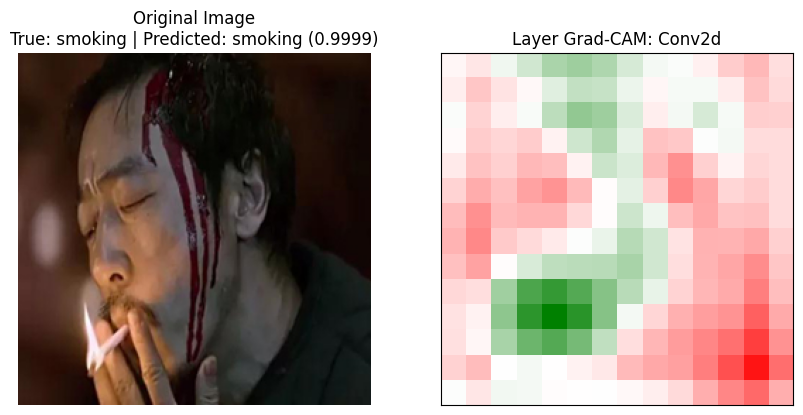

In [ ]:
# Specify the target layer for Grad-CAM visualization
target_layer = [module for name, module in model.named_modules() if isinstance(module, nn.Conv2d)][-1]

# Get the actual layer name
layer_name = target_layer.__class__.__name__

# Initialize Layer Grad-CAM with the model and the target layer
layer_gradcam = LayerGradCam(model, target_layer)

# Compute the attributions for the target layer
attributions_lgc = layer_gradcam.attribute(input_img, target=pred_label_idx)

# Visualize the attributions
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
ax[0].imshow(img)
ax[0].set_title(f"Original Image\nTrue: {true_label} | Predicted: {label_mapping[pred_label_idx]} ({predicted_prob:.4f})")
ax[0].axis('off')

# Visualize the attributions for the target layer
_ = viz.visualize_image_attr(
    attributions_lgc[0].cpu().permute(1, 2, 0).detach().numpy(),
    sign="all",
    title=f"Layer Grad-CAM: {layer_name}",
    plt_fig_axis=(fig, ax[1])
)

plt.show()

Original Attribution Shape: torch.Size([1, 1, 14, 14])
Upsampled Attribution Shape: torch.Size([1, 1, 224, 224])
Input Image Shape: torch.Size([1, 3, 224, 224])


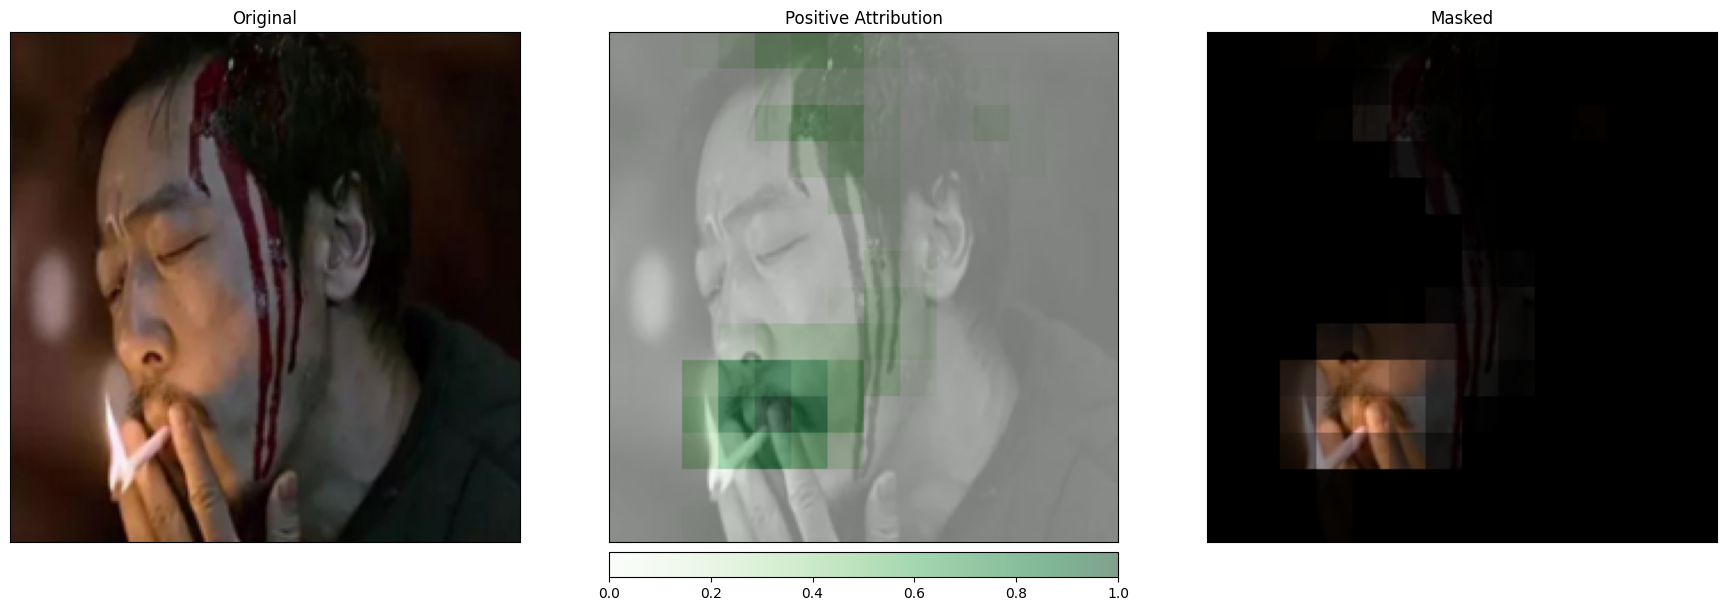

In [ ]:
# Upsample the Layer Grad-CAM attributions to match the input image size
upsamp_attr_lgc = LayerAttribution.interpolate(attributions_lgc, input_img.shape[2:])

# Print the original and upsampled attribution shapes along with the input image shape
print("Original Attribution Shape:", attributions_lgc.shape)
print("Upsampled Attribution Shape:", upsamp_attr_lgc.shape)
print("Input Image Shape:", input_img.shape)

# Visualize using visualize_image_attr_multiple
_ = viz.visualize_image_attr_multiple(
    upsamp_attr_lgc[0].cpu().permute(1, 2, 0).detach().numpy(),
    input_tensor_for_viz,
    methods=["original_image", "blended_heat_map", "masked_image"],
    signs=["all", "positive", "positive"],
    show_colorbar=True,
    titles=["Original", "Positive Attribution", "Masked"],
    fig_size=(18, 6)
)

plt.show()

**Observations and Insights:**

Layer Grad-CAM is typically applied to the last convolutional layer, as this layer maintains spatial information within the image—details often lost in fully connected layers—while capturing high-level features that earlier convolutional layers may not fully extract. By focusing on this layer, Grad-CAM highlights the regions that significantly influenced the model's decision. The resulting heatmap is then upsampled to match the input dimensions, providing clear and interpretable visualizations.

Here, the model has reached a point where it has extracted most of the relevant features from the input through previous layers and is now primarily highlighting the area around the cigarette as a positive indication for the "smoking" class.



---



##Conclusion

Working on this project provided an opportunity to tackle challenges in image analysis and explore emerging methods for interpreting Deep Learning models.

</br>

- **Data Scarcity:** Machine learning models often rely on abundant data, but this is not always the case. Working with smaller datasets presents a challenge, as models usually need significant volume and variety to learn patterns effectively and generalize well to unseen data. Facing data scarcity, I applied two methods to address this limitation:

 1. **Data Augmentation:** This approach increases dataset size while enhancing the model's ability to generalize by introducing slight variations such as resizing, rotating, adjusting contrast, thus adding diversity to the training data. In real-world scenarios, models encounter varying image qualities, and augmentation serves as preparation for these possibilities. It not only expands the dataset but also provides the model with more varied examples.

 2. **Transfer Learning:** Recognizing that data augmentation alone might not sufficiently address data scarcity, transfer learning became essential. This concept leverages a pre-trained model from a similar task, known as a "Pretext Task", and applies it to the "Target Task" at hand. For this project, I selected the VGG19 model, trained on a large-scale image classification task similar to my task of classifying images as either "smoking" or "not smoking". While VGG16, with its simpler architecture, was an option, I chose VGG19's added depth to capture more detailed features within these classes. Given that its pre-training did not specifically cover categories like "smoking" and "not smoking", this depth proved useful in recognizing subtle patterns introduced through data augmentation.

</br>

- **Captum:** Exploring Primary Attribution and Layer Attribution methods within Captum offered valuable insights into the model's reasoning, allowing me to identify which features the network prioritized in its predictions. Each method provided a unique perspective, enabling me to interpret the model's decisions more transparently. Captum, along with other interpretability tools, highlights the growing possibilities in understanding model behavior, a critical step toward demystifying "black box" models.


Reflecting on these strides underscores the advancements being made in this field and the many paths yet to be explored. This project offered a rich experience in addressing data limitations and choosing a model suited to the data and task at hand. Engaging with Captum provided a unique perspective on the internal mechanics of model predictions, reinforcing my appreciation for the rapid progress in this evolving field.